## Learning a function from a formula

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.463717 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.62e-01]    [2.24e-01]    [1.04e+00]    
1000      [1.42e-04]    [1.63e-04]    [2.79e-02]    
2000      [1.47e-05]    [3.65e-05]    [1.32e-02]    
3000      [1.81e-06]    [1.94e-05]    [9.64e-03]    
4000      [2.84e-06]    [1.61e-05]    [8.78e-03]    
5000      [4.07e-07]    [1.40e-05]    [8.19e-03]    
6000      [2.01e-06]    [1.39e-05]    [8.16e-03]    
7000      [2.19e-06]    [1.53e-05]    [8.56e-03]    
8000      [1.44e-06]    [1.52e-05]    [8.54e-03]    
9000      [2.99e-08]    [1.24e-05]    [7.71e-03]    
10000     [1.26e-07]    [1.23e-05]    [7.66e-03]    

Best model at step 9000:
  train loss: 2.99e-08
  test loss: 1.24e-05
  test metric: [7.71e-03]

'train' took 2.581398 s

Saving loss history to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/

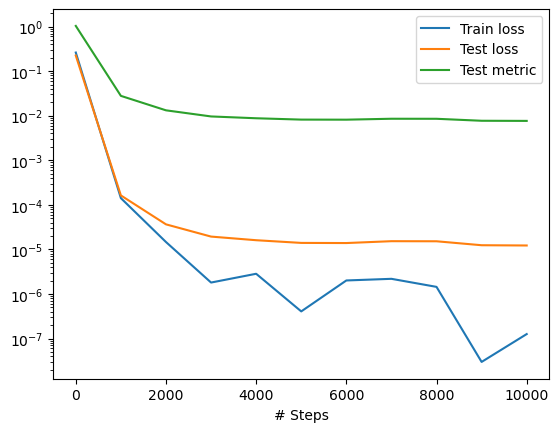

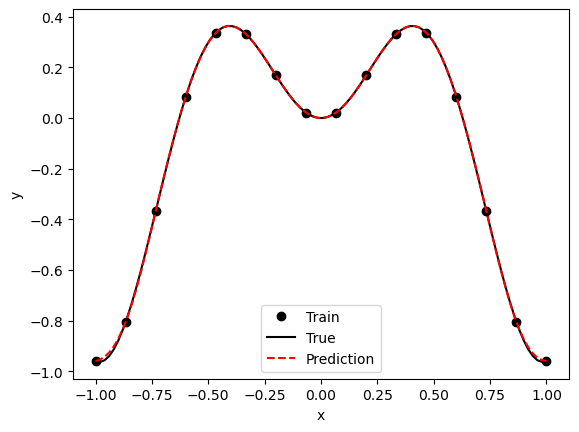

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np


def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)


geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Learning a function from a dataset
We will learn a function from a dataset. The dataset used to train the model can be found here, and the dataset used to test the model can be found here.

#### The next step is to import the dataset needed for the model training
The variables fname_train and fname_test are used to import the dataset and recall the dataset later in the code.

In [11]:
fname_train = "../Data_sets/learn_func_train"
fname_test = "../Data_sets/learn_func_test"

#### Defining the dataset- 
The next step is to define data files names and standardize it in an appropriate form

In [12]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

#### Defining the model specifics- 
The first line defines the layout of the network size used to train the model. The next line specifies the activation function used tanh and the initializer as Glorot uniform.

In [14]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

#### Build the model- using adam as an optimizer with a learning rate of 0.001. The model is trained with 50000 iterations:

In [15]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000208 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.74e-01]    [3.89e-01]    [8.73e-01]    
1000      [7.22e-03]    [7.34e-03]    [1.20e-01]    
2000      [5.71e-03]    [6.08e-03]    [1.09e-01]    
3000      [5.23e-03]    [5.65e-03]    [1.05e-01]    
4000      [4.93e-03]    [5.43e-03]    [1.03e-01]    
5000      [5.11e-03]    [5.48e-03]    [1.04e-01]    
6000      [4.77e-03]    [5.27e-03]    [1.02e-01]    
7000      [5.70e-03]    [5.94e-03]    [1.08e-01]    
8000      [4.75e-03]    [5.30e-03]    [1.02e-01]    
9000      [4.74e-03]    [5.32e-03]    [1.02e-01]    
10000     [4.74e-03]    [5.34e-03]    [1.02e-01]    
11000     [4.76e-03]    [5.39e-03]    [1.03e-01]    
12000     [4.72e-03]    [5.31e-03]    [1.02e-01]    
13000     [4.72e-03]    [5.27e-03]    [1.02e-01]    
14000     [4.74e-03]    [5.26e-03]    [1.02e-01]    
15000     [4.71e-03]    [5.25e-03]    [1.01e-01]    
16000     [4.71e-03]    [5.26e-03]

#### Save and plot the best trained model

Saving loss history to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/loss.dat ...
Saving training data to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/train.dat ...
Saving test data to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/test.dat ...


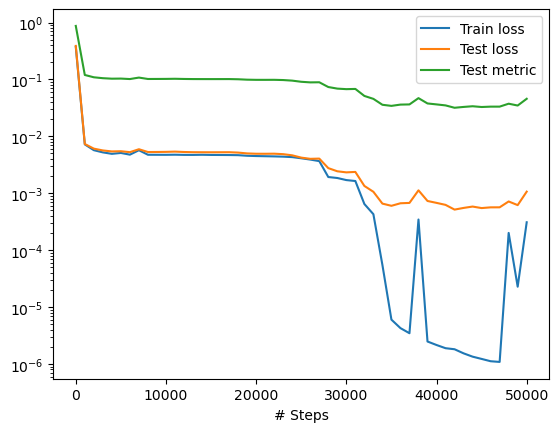

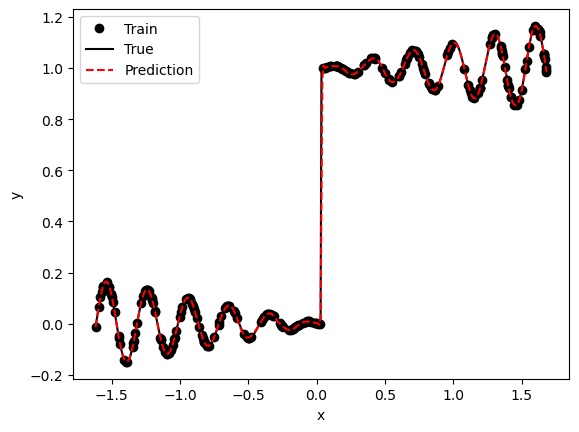

In [16]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Forward Problems

## 1D Heat equation

 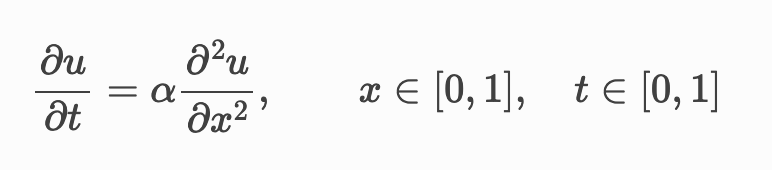

where 
 is the thermal diffusivity constant.

With Dirichlet boundary conditions:

and periodic(sinusoidal) inital condition:

 
where 
 is the length of the bar, 
 is the frequency of the sinusoidal initial conditions.

The exact solution is 
 


In [10]:
import deepxde as dde
import numpy as np

### Defining the parameters of the equation:

In [2]:
a = 0.4
L = 1
n = 1

### Define a computational geometry and time domain
We can use a built-in class Interval and TimeDomain and we combine both the domains using GeometryXTime as follows

In [3]:
geom = dde.geometry.Interval(0, L)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

### Express the PDE residual of the Heat equation
The first argument to pde is 2-dimensional vector where the first component(x[:,0]) is 
-coordinate and the second componenet (x[:,1]) is the 
-coordinate. The second argument is the network output, i.e., the solution u(x,t), but here we use y as the name of the variable.

In [4]:
def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t - a * dy_xx

### Consider the boundary/initial condition
on_boundary is chosen here to use the whole boundary of the computational domain in considered as the boundary condition. We include the geomtime space, time geometry created above and on_boundary as the BCs in the DirichletBC function of DeepXDE.
We also define IC which is the inital condition for the burgers equation and we use the computational domain, initial function, and on_initial to specify the IC

In [5]:
bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime,
    lambda x: np.sin(n * np.pi * x[:, 0:1] / L),
    lambda _, on_initial: on_initial,
)

### Define the TimePDE problem
The number 2540 is the number of training residual points sampled inside the domain, and the number 80 is the number of training points sampled on the boundary. We also include 160 initial residual points for the initial conditions.

In [6]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    num_test=2540,
)

### Choose the network
Here, we use a fully connected neural network of depth 4 (i.e., 3 hidden layers) and width 20 neurons.
We use tanh as the activation function for all hidden layers.
The "Glorot normal"  is used for the weights initialization

In [7]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")


### Build a Model and choose the optimizer and learning rate:

In [8]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
'compile' took 0.604227 s



### Train the model for 20000 iterations

In [ ]:
losshistory, train_state = model.train(iterations=20000)

#### After we train the network using Adam, we continue to train the network using L-BFGS to achieve a smaller loss

In [11]:
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.000196 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.07e-02, 7.93e-03, 4.73e-01]    [1.08e-02, 7.93e-03, 4.73e-01]    []  

Best model at step 0:
  train loss: 4.92e-01
  test loss: 4.92e-01
  test metric: []

'train' took 0.011584 s



### Generate test data

In [15]:
def heat_eq_exact_solution(x, t):
    """Returns the exact solution for a given x and t (for sinusoidal initial conditions).

    Parameters
    ----------
    x : np.ndarray
    t : np.ndarray
    """
    return np.exp(-(n**2 * np.pi**2 * a * t) / (L**2)) * np.sin(n * np.pi * x / L)


def gen_exact_solution():
    """Generates exact solution for the heat equation for the given values of x and t."""
    # Number of points in each dimension:
    x_dim, t_dim = (256, 201)

    # Bounds of 'x' and 't':
    x_min, t_min = (0, 0.0)
    x_max, t_max = (L, 1.0)

    # Create tensors:
    t = np.linspace(t_min, t_max, num=t_dim).reshape(t_dim, 1)
    x = np.linspace(x_min, x_max, num=x_dim).reshape(x_dim, 1)
    usol = np.zeros((x_dim, t_dim)).reshape(x_dim, t_dim)

    # Obtain the value of the exact solution for each generated point:
    for i in range(x_dim):
        for j in range(t_dim):
            usol[i][j] = heat_eq_exact_solution(x[i], t[j])

    # Save solution:
    np.savez("heat_eq_data", x=x, t=t, usol=usol)
    
def gen_testdata():
    """Import and preprocess the dataset with the exact solution."""
    # Load the data:
    data = np.load("heat_eq_data.npz")
    # Obtain the values for t, x, and the excat solution:
    t, x, exact = data["t"], data["x"], data["usol"].T
    # Process the data and flatten it out (like labels and features):
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y

In [16]:
# Generate a dataset with the exact solution (if you dont have one):
gen_exact_solution()

/var/folders/n3/qn6ms0c96j3854bjwrzs27_80000gn/T/ipykernel_51192/3434870655.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  usol[i][j] = heat_eq_exact_solution(x[i], t[j])


### Plot/print the results

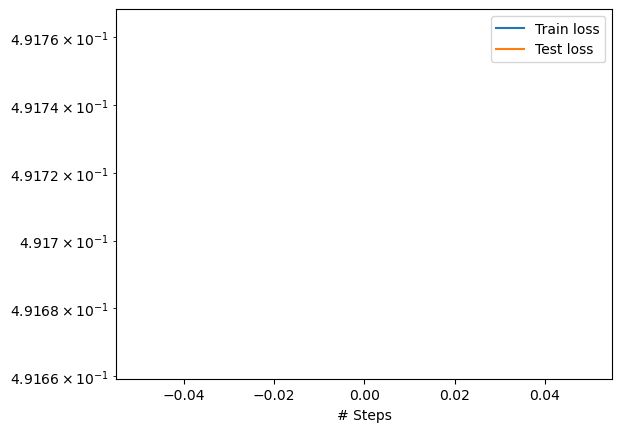

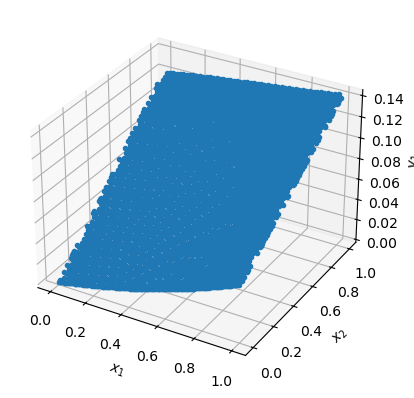

Mean residual: 0.102635115
L2 relative error: 0.9365417921780352


In [17]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)
X, y_true = gen_testdata()
y_pred = model.predict(X)
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

# Inverse problems

## Inverse problem for the diffusion equation

Compiling model...
'compile' took 0.000060 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.44e+01, 3.69e-02, 4.47e-01, 1.41e-01]    [1.67e+01, 3.69e-02, 4.47e-01, 1.41e-01]    [9.88e-01]    
0 [2.00e+00]
1000      [4.45e-03, 2.04e-02, 4.75e-02, 1.54e-02]    [4.42e-03, 2.04e-02, 4.75e-02, 1.54e-02]    [3.94e-01]    
1000 [1.96e+00]
2000      [1.39e-03, 3.54e-03, 9.78e-03, 7.73e-03]    [2.84e-03, 3.54e-03, 9.78e-03, 7.73e-03]    [3.99e-01]    
2000 [1.69e+00]
3000      [1.38e-03, 1.08e-03, 9.21e-04, 4.25e-03]    [4.12e-03, 1.08e-03, 9.21e-04, 4.25e-03]    [2.87e-01]    
3000 [1.43e+00]
4000      [2.51e-04, 3.32e-04, 1.23e-05, 1.49e-03]    [1.46e-03, 3.32e-04, 1.23e-05, 1.49e-03]    [1.63e-01]    
4000 [1.21e+00]
5000      [4.77e-05, 5.20e-05, 1.34e-05, 2.05e-04]    [2.27e-04, 5.20e-05, 1.34e-05, 2.05e-04]    [5.82e-02]    
5000 [1.07e+00]
6000      [5.01e-05, 9.01e-06, 7.11e-06, 2.17e-05] 

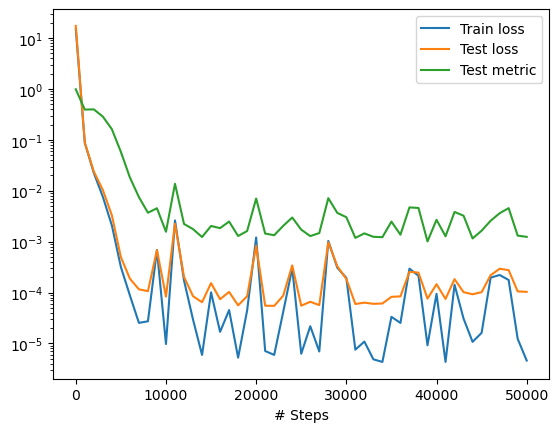

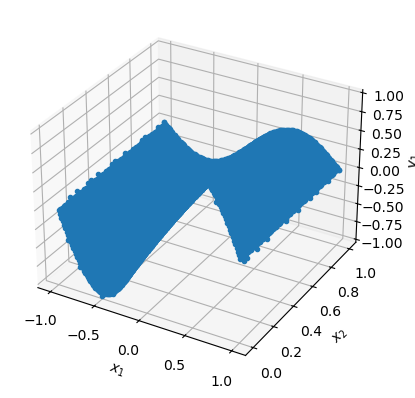

In [3]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
import tensorflow as tf
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

import torch



C = dde.Variable(2.0)


def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
  
    return (
        dy_t
        - C * dy_xx
        + torch.exp(-x[:, 1:])
        * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    )
 


def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

observe_x = np.vstack((np.linspace(-1, 1, num=10), np.full((10), 1))).T
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x), component=0)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_y],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    anchors=observe_x,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=C
)
variable = dde.callbacks.VariableValue(C, period=1000)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Inverse problem for the Navier-Stokes equation of incompressible flow around cylinder



In [5]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle

An inverse problem of the Navier-Stokes equation of incompressible flow around cylinder with Re=100

References: https://doi.org/10.1016/j.jcp.2018.10.045 Section 4.1.1
"""

import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re

# true values
C1true = 1.0
C2true = 0.01

# Load training data
def load_training_data(num):
    data = loadmat("../Data_sets/cylinder_nektar_wake.mat")
    U_star = data["U_star"]  # N x 2 x T
    P_star = data["p_star"]  # N x T
    t_star = data["t"]  # T x 1
    X_star = data["X_star"]  # N x 2
    N = X_star.shape[0]
    T = t_star.shape[0]
    # Rearrange Data
    XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
    YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
    TT = np.tile(t_star, (1, N)).T  # N x T
    UU = U_star[:, 0, :]  # N x T
    VV = U_star[:, 1, :]  # N x T
    PP = P_star  # N x T
    x = XX.flatten()[:, None]  # NT x 1
    y = YY.flatten()[:, None]  # NT x 1
    t = TT.flatten()[:, None]  # NT x 1
    u = UU.flatten()[:, None]  # NT x 1
    v = VV.flatten()[:, None]  # NT x 1
    p = PP.flatten()[:, None]  # NT x 1
    # training domain: X × Y = [1, 8] × [−2, 2] and T = [0, 7]
    data1 = np.concatenate([x, y, t, u, v, p], 1)
    data2 = data1[:, :][data1[:, 2] <= 7]
    data3 = data2[:, :][data2[:, 0] >= 1]
    data4 = data3[:, :][data3[:, 0] <= 8]
    data5 = data4[:, :][data4[:, 1] >= -2]
    data_domain = data5[:, :][data5[:, 1] <= 2]
    # choose number of training points: num =7000
    idx = np.random.choice(data_domain.shape[0], num, replace=False)
    x_train = data_domain[idx, 0:1]
    y_train = data_domain[idx, 1:2]
    t_train = data_domain[idx, 2:3]
    u_train = data_domain[idx, 3:4]
    v_train = data_domain[idx, 4:5]
    p_train = data_domain[idx, 5:6]
    return [x_train, y_train, t_train, u_train, v_train, p_train]

# Parameters to be identified
C1 = dde.Variable(0.0)
C2 = dde.Variable(0.0)

# Define Navier Stokes Equations (Time-dependent PDEs)
def Navier_Stokes_Equation(x, y):
    u = y[:, 0:1]
    v = y[:, 1:2]
    p = y[:, 2:3]
    du_x = dde.grad.jacobian(y, x, i=0, j=0)
    du_y = dde.grad.jacobian(y, x, i=0, j=1)
    du_t = dde.grad.jacobian(y, x, i=0, j=2)
    dv_x = dde.grad.jacobian(y, x, i=1, j=0)
    dv_y = dde.grad.jacobian(y, x, i=1, j=1)
    dv_t = dde.grad.jacobian(y, x, i=1, j=2)
    dp_x = dde.grad.jacobian(y, x, i=2, j=0)
    dp_y = dde.grad.jacobian(y, x, i=2, j=1)
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    continuity = du_x + dv_y
    x_momentum = du_t + C1 * (u * du_x + v * du_y) + dp_x - C2 * (du_xx + du_yy)
    y_momentum = dv_t + C1 * (u * dv_x + v * dv_y) + dp_y - C2 * (dv_xx + dv_yy)
    return [continuity, x_momentum, y_momentum]

# Define Spatio-temporal domain
# Rectangular
Lx_min, Lx_max = 1.0, 8.0
Ly_min, Ly_max = -2.0, 2.0
# Spatial domain: X × Y = [1, 8] × [−2, 2]
space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])
# Time domain: T = [0, 7]
time_domain = dde.geometry.TimeDomain(0, 7)
# Spatio-temporal domain
geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)

# Get the training data: num = 7000
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_xyt = np.hstack((ob_x, ob_y, ob_t))
observe_u = dde.icbc.PointSetBC(ob_xyt, ob_u, component=0)
observe_v = dde.icbc.PointSetBC(ob_xyt, ob_v, component=1)

# Training datasets and Loss
data = dde.data.TimePDE(
    geomtime,
    Navier_Stokes_Equation,
    [observe_u, observe_v],
    num_domain=700,
    num_boundary=200,
    num_initial=100,
    anchors=ob_xyt,
)

# Neural Network setup
layer_size = [3] + [50] * 6 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)

# callbacks for storing results
fnamevar = "variables.dat"
variable = dde.callbacks.VariableValue([C1, C2], period=100, filename=fnamevar)

# Compile, train and save model
model.compile("adam", lr=1e-3, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
model.compile("adam", lr=1e-4, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
# model.save(save_path = "./NS_inverse_model/model")
f = model.predict(ob_xyt, operator=Navier_Stokes_Equation)
print("Mean residual:", np.mean(np.absolute(f)))

# Plot Variables:
# reopen saved data using callbacks in fnamevar
lines = open(fnamevar, "r").readlines()
# read output data in fnamevar
Chat = np.array(
    [
        np.fromstring(
            min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
            sep=",",
        )
        for line in lines
    ]
)
l, c = Chat.shape
plt.semilogy(range(0, l * 100, 100), Chat[:, 0], "r-")
plt.semilogy(range(0, l * 100, 100), Chat[:, 1], "k-")
plt.semilogy(range(0, l * 100, 100), np.ones(Chat[:, 0].shape) * C1true, "r--")
plt.semilogy(range(0, l * 100, 100), np.ones(Chat[:, 1].shape) * C2true, "k--")
plt.legend(["C1hat", "C2hat", "True C1", "True C2"], loc="right")
plt.xlabel("Epochs")
plt.title("Variables")
plt.show()

# Plot the velocity distribution of the flow field:
for t in range(0, 8):
    [ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=140000)
    xyt_pred = np.hstack((ob_x, ob_y, t * np.ones((len(ob_x), 1))))
    uvp_pred = model.predict(xyt_pred)
    x_pred, y_pred, t_pred = xyt_pred[:, 0], xyt_pred[:, 1], xyt_pred[:, 2]
    u_pred, v_pred, p_pred = uvp_pred[:, 0], uvp_pred[:, 1], uvp_pred[:, 2]
    x_true = ob_x[ob_t == t]
    y_true = ob_y[ob_t == t]
    u_true = ob_u[ob_t == t]
    fig, ax = plt.subplots(2, 1)
    cntr0 = ax[0].tricontourf(x_pred, y_pred, u_pred, levels=80, cmap="rainbow")
    cb0 = plt.colorbar(cntr0, ax=ax[0])
    cntr1 = ax[1].tricontourf(x_true, y_true, u_true, levels=80, cmap="rainbow")
    cb1 = plt.colorbar(cntr1, ax=ax[1])
    ax[0].set_title("u-PINN " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[0].axis("scaled")
    ax[0].set_xlabel("X", fontsize=7.5, family="Arial")
    ax[0].set_ylabel("Y", fontsize=7.5, family="Arial")
    ax[1].set_title("u-Reference solution " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[1].axis("scaled")
    ax[1].set_xlabel("X", fontsize=7.5, family="Arial")
    ax[1].set_ylabel("Y", fontsize=7.5, family="Arial")
    fig.tight_layout()
    plt.show()

Compiling model...
'compile' took 0.000132 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [3.06e-03, 7.88e-03, 1.63e-02, 4.68e-01, 1.60e-01]    [3.06e-03, 7.88e-03, 1.63e-02, 4.68e-01, 1.60e-01]    []  
1000      [5.95e-04, 6.50e-04, 9.04e-04, 1.88e-03, 2.66e-03]    [5.95e-04, 6.50e-04, 9.04e-04, 1.88e-03, 2.66e-03]    []  
2000      [2.56e-04, 3.18e-04, 2.95e-04, 7.06e-04, 1.01e-03]    [2.56e-04, 3.18e-04, 2.95e-04, 7.06e-04, 1.01e-03]    []  
3000      [1.86e-04, 2.30e-04, 2.00e-04, 4.41e-04, 6.09e-04]    [1.86e-04, 2.30e-04, 2.00e-04, 4.41e-04, 6.09e-04]    []  


KeyboardInterrupt: 